In [1]:
from conf import *
from pathlib import Path
from ydata_profiling import ProfileReport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/levine/Desktop/fsds/data/clean/20250615-London-listings.csv.gz")

In [3]:
print(df.columns)

Index(['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'reviews_per_month'],
      dtype='object')


In [9]:
lcount=df.host_total_listings_count

1. Is Airbnb over comercialization

In [5]:
#count the hosts ratio who have more than 2 houses in Airbnb
multiratio=(df.host_total_listings_count > 2).mean()
print(multiratio)

0.5781310088450199


Text(0, 0.5, 'Proportion of hosts')

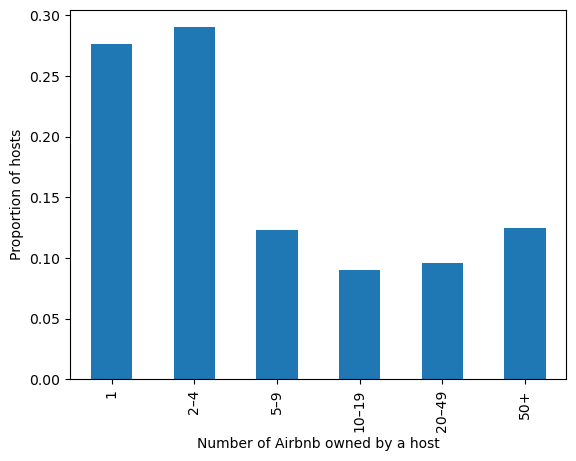

In [10]:
bins = [1, 2, 5, 10, 20, 50, 100]
labels = ["1", "2–4", "5–9", "10–19", "20–49", "50+"]
#use bin to separate the host with the number of their house in renting. 
df['host_bin'] = pd.cut(lcount, bins=[0,1,4,9,19,49,999], labels=labels)
#I use normalize=True to use propotion as y lable rather than the number
df['host_bin'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xlabel("Number of Airbnb owned by a host")
plt.ylabel("Proportion of hosts")

2. Is Airbnb affect housing supply

In [11]:
#the ratio of Entire home/apt
ctype=df.room_type.value_counts(normalize=True)
print(ctype)

room_type
Entire home/apt    0.666173
Private room       0.330552
Shared room        0.002098
Hotel room         0.001177
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

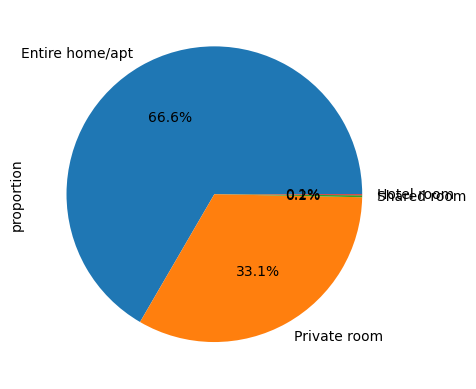

In [12]:
ctype.plot.pie(autopct='%1.1f%%')

Text(0.5, 0, 'Room Type')

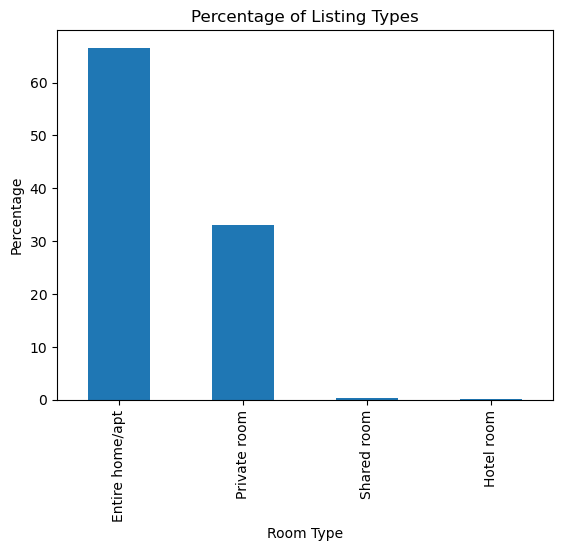

In [13]:
ctype.mul(100).plot.bar(title='Percentage of Listing Types')
plt.ylabel('Percentage')
plt.xlabel('Room Type')

<Axes: xlabel='longitude', ylabel='latitude'>

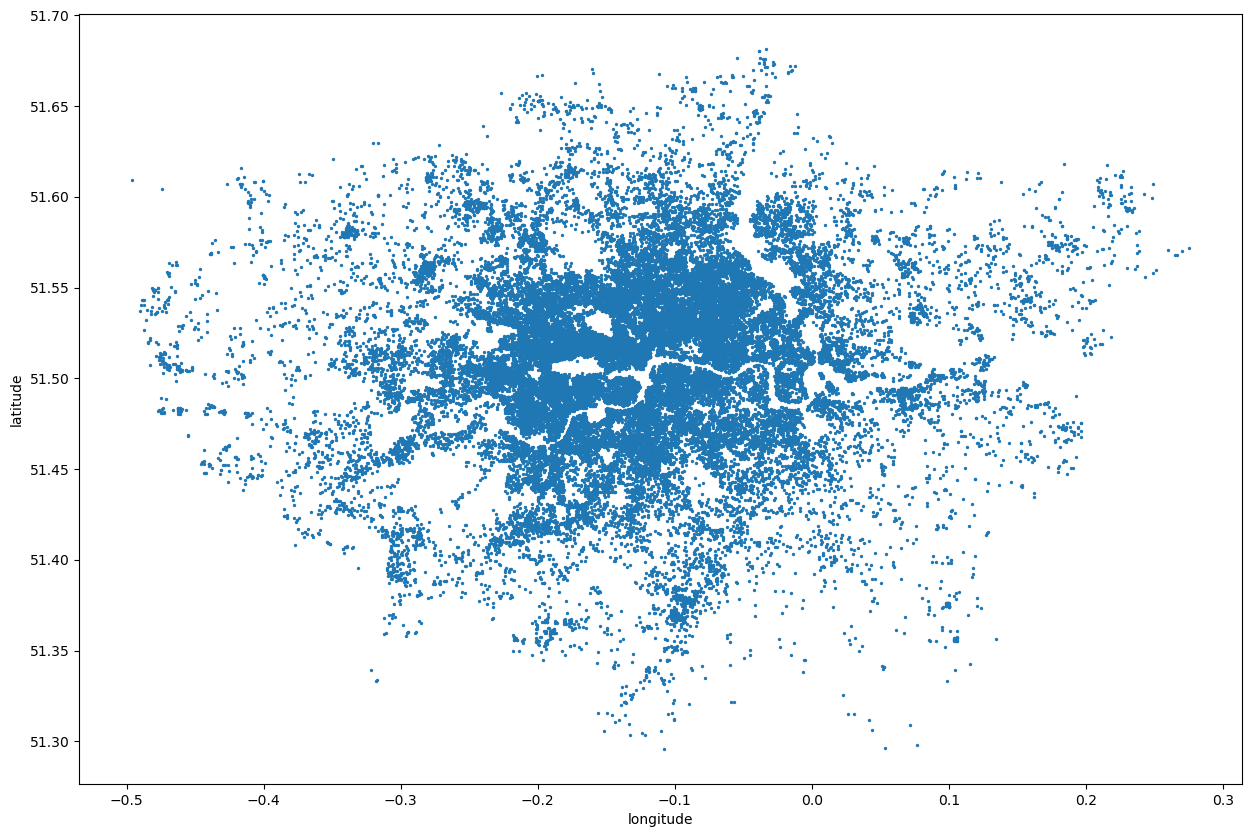

In [14]:
homeapt = df[df.room_type == 'Entire home/apt']
#This is the plot way in practical 6, but I print only the entire home and apartment.
homeapt.plot.scatter(x='longitude', y='latitude', s=2, figsize=(15,10))
#Maybe helps a bit..

<Axes: xlabel='longitude', ylabel='latitude'>

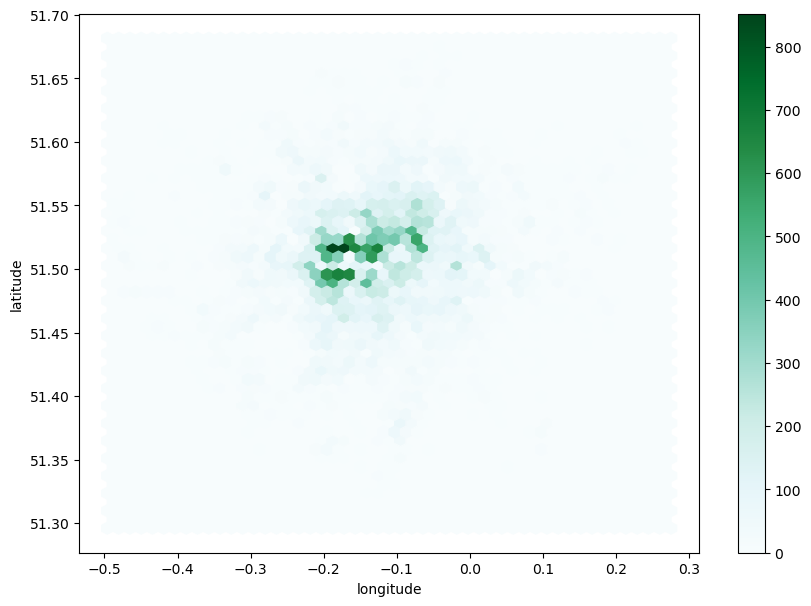

In [15]:
#The Hex bin plot
homeapt.plot.hexbin(x='longitude', y='latitude', gridsize=50, figsize=(10,7))

3. Is Airbnb hosts may against the policy(short-let regulation)(https://www.nestify.co.uk/article/90-day-rule/)

In [16]:
#entire house in renting and avaliability in a year
morethan90=(df.room_type=='Entire home/apt') & (df.availability_365 < 275)

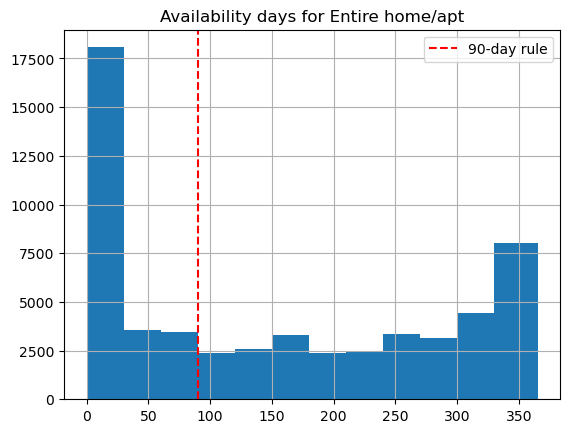

In [17]:
homeapt.availability_365.hist(bins=[0,30,60,90,120,150,180,210,240,270,300,330,365],)
#use a red line to separate less or over 90 days.
plt.axvline(90, color='red', linestyle='--', label='90-day rule')
plt.title("Availability days for Entire home/apt")
plt.legend()
plt.show()

In [18]:
df['over90']=df.availability_365 < 275
df['less90']=df.availability_365 > 275
print("There are", df.over90.sum(), "houses may violate")
print("There are", df.less90.sum(), "houses are surely legal")

There are 62964 houses may violate
There are 22749 houses are surely legal


5. The price structure of Airbnb in London

<Axes: ylabel='Frequency'>

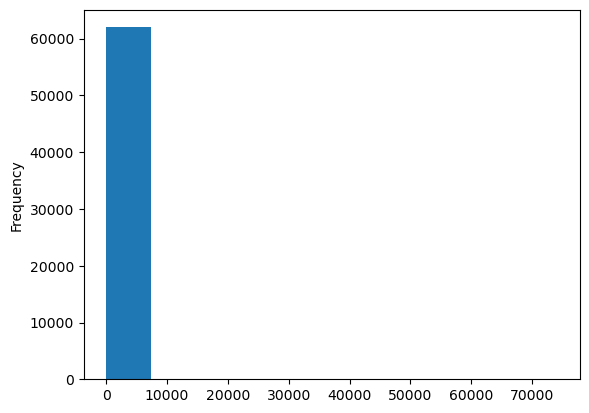

In [19]:
#Firstly I copy some copy from practical 6
df.price.plot.hist()

<Axes: ylabel='Frequency'>

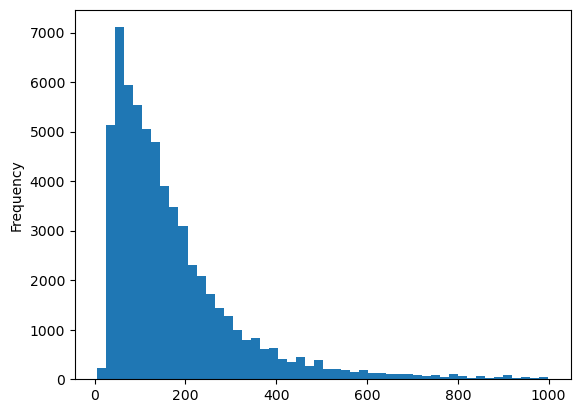

In [20]:
df[df.price < 1000].price.plot.hist(bins=50)

<Axes: ylabel='Density'>

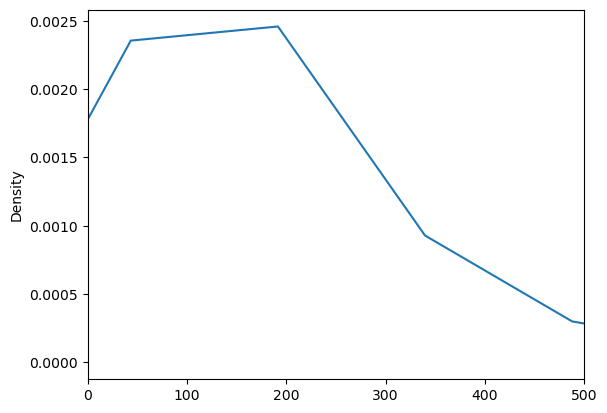

In [21]:
df.price.plot.kde(xlim=(0,500))

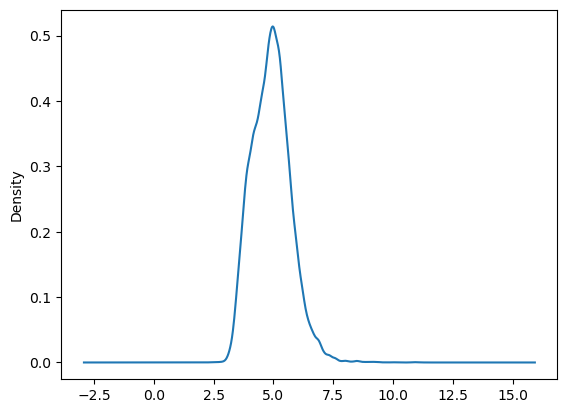

In [31]:
df['lnprice'] = np.log(df.price)
df.lnprice.plot.kde()

In [23]:
#Here is the price of every type of room
df.groupby('room_type').price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,42110.0,254.724222,550.934783,8.0,123.00,178.0,273.0,74100.0
Hotel room,68.0,302.882353,882.452697,29.0,98.75,164.0,288.5,7377.0
Private room,19704.0,118.786389,1283.355249,6.0,45.00,60.0,84.0,65000.0
Shared room,167.0,83.437126,181.708012,15.0,29.00,34.0,55.5,1000.0


6. Review-based occupancy

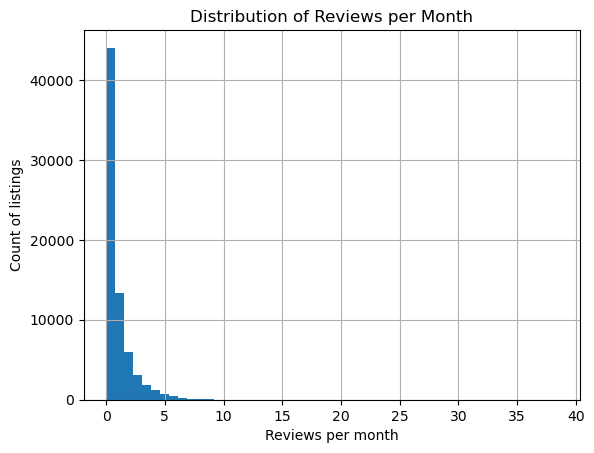

In [35]:
df.reviews_per_month.hist(bins=50)
plt.title("Distribution of Reviews per Month")
plt.xlabel("Reviews per month")
plt.ylabel("Count of listings")
plt.show()

Text(0, 0.5, 'Reviews per month')

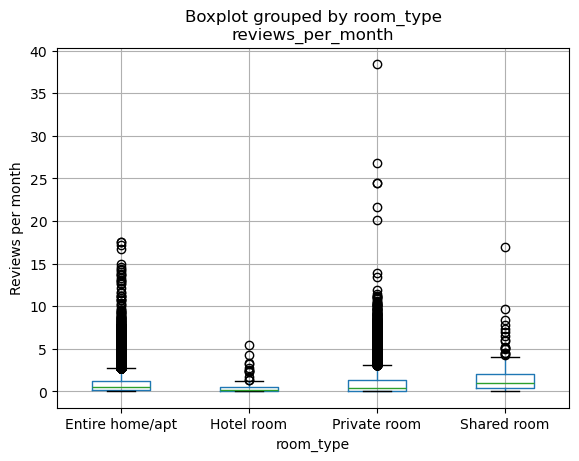

In [38]:
#the boxplot by using the reviews per month
df.boxplot(column='reviews_per_month', by='room_type')
plt.ylabel("Reviews per month")

Text(0.5, 1.0, 'Spatial Distribution of Reviews Highly Active Airbnb')

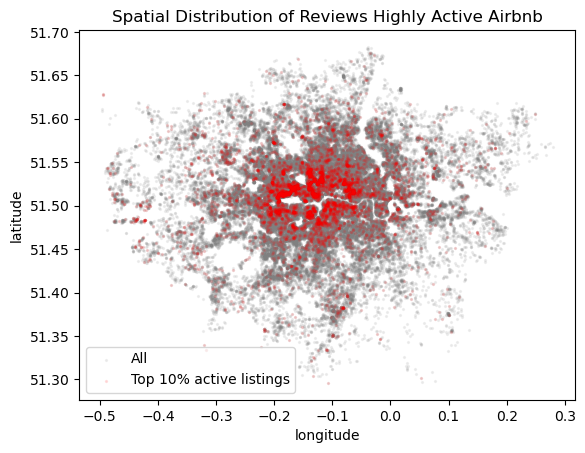

In [51]:
#I select the most active review's airbnb, and plot it in red with all airbnb which is grey.
highactive = df[df.reviews_per_month > df.reviews_per_month.quantile(0.90)]
allairbnb = df.plot.scatter(x='longitude', y='latitude',s=2, alpha=0.1, color='grey', label='All')
highactive.plot.scatter(ax=allairbnb,x='longitude', y='latitude',s=2, alpha=0.1,color='red', label='Top 10% active listings')
plt.title("Spatial Distribution of Reviews Highly Active Airbnb")